<a href="https://colab.research.google.com/github/Thakurji04/Number-plate-detection/blob/main/face_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=467533c5821a4d05628f1f7c220c16c4ed360700301426a421db8731af726f98
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [5]:
!mkdir recognized
!wget https://www.thefamouspeople.com/profiles/images/dawood-ibrahim-4.jpg -O recognized/daud.jpg
!wget https://www.theindianwire.com/wp-content/uploads/2019/05/ATIQ-AHMED.jpg -O recognized/atiq.jpg

mkdir: cannot create directory ‘recognized’: File exists
--2023-12-07 11:36:01--  https://www.thefamouspeople.com/profiles/images/dawood-ibrahim-4.jpg
Resolving www.thefamouspeople.com (www.thefamouspeople.com)... 104.26.7.118, 172.67.69.79, 104.26.6.118
Connecting to www.thefamouspeople.com (www.thefamouspeople.com)|104.26.7.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72887 (71K) [image/jpeg]
Saving to: ‘recognized/daud.jpg’

recognized/daud.jpg 100%[===================>]  71.18K  --.-KB/s    in 0.02s   

2023-12-07 11:36:01 (3.10 MB/s) - ‘recognized/daud.jpg’ saved [72887/72887]

--2023-12-07 11:36:01--  https://www.theindianwire.com/wp-content/uploads/2019/05/ATIQ-AHMED.jpg
Resolving www.theindianwire.com (www.theindianwire.com)... 104.21.91.37, 172.67.209.131, 2606:4700:3030::6815:5b25, ...
Connecting to www.theindianwire.com (www.theindianwire.com)|104.21.91.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41716 (41K) [

In [6]:
!mkdir newimages
!wget https://assets.telegraphindia.com/telegraph/a52021a2-c22a-4d04-8212-9759315db67d.jpg -O newimages/1.jpg
!wget https://images.tv9hindi.com/wp-content/uploads/2023/04/asad-ahmed-encounter-in-jhansi-know-atique-ahmed-family-details-in-hindi-1.jpg?w=1200 -O newimages/3.jpg

--2023-12-07 11:36:14--  https://assets.telegraphindia.com/telegraph/a52021a2-c22a-4d04-8212-9759315db67d.jpg
Resolving assets.telegraphindia.com (assets.telegraphindia.com)... 23.65.247.212, 2600:1407:3c00:782::5cb, 2600:1407:3c00:78d::5cb
Connecting to assets.telegraphindia.com (assets.telegraphindia.com)|23.65.247.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196415 (192K) [image/jpeg]
Saving to: ‘newimages/1.jpg’

newimages/1.jpg     100%[===================>] 191.81K  --.-KB/s    in 0.05s   

2023-12-07 11:36:14 (4.02 MB/s) - ‘newimages/1.jpg’ saved [196415/196415]

--2023-12-07 11:36:14--  https://images.tv9hindi.com/wp-content/uploads/2023/04/asad-ahmed-encounter-in-jhansi-know-atique-ahmed-family-details-in-hindi-1.jpg?w=1200
Resolving images.tv9hindi.com (images.tv9hindi.com)... 18.160.213.97, 18.160.213.113, 18.160.213.23, ...
Connecting to images.tv9hindi.com (images.tv9hindi.com)|18.160.213.97|:443... connected.
HTTP request sent, awaiting re

Processing 1.jpg


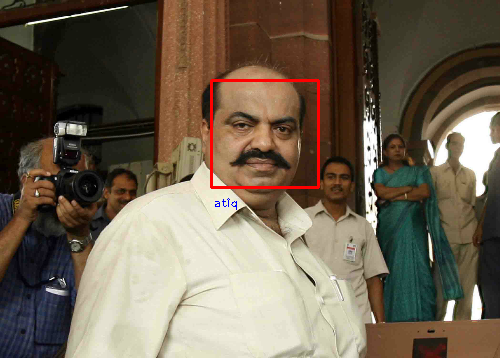

Processing 3.jpg


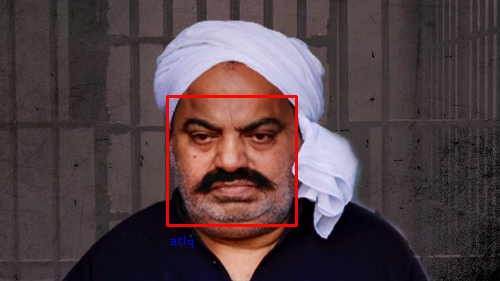

In [13]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width/ float(w)
  height = int(h * ratio)
  return cv2.resize(img,(width,height))

known_encodings = []
known_names = []
known_dir = 'recognized'
unknown_dir = 'newimages'

for file in os.listdir(known_dir):
  img = read_img(known_dir+ '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

for file in os.listdir(unknown_dir):
  print('Processing',file)
  img = read_img(unknown_dir+ '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if results[i]:
      name = (known_names[i])
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img,name,(left+2,bottom+20), cv2.FONT_HERSHEY_PLAIN,0.8,(255,0,0),1)
      cv2_imshow(img)
